In [1]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "D:\PROJECT-BENGKOD\Dataset\ObesityDataSet.csv"

In [3]:
#load dataset
df = pd.read_csv(file_path)

#Menampilkan 5 data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

## informasi dataset

In [4]:
#Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

## cek missing value 

In [5]:
#Menampilkan missing value
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


## visuslisasi keseimbangan pada kelas target

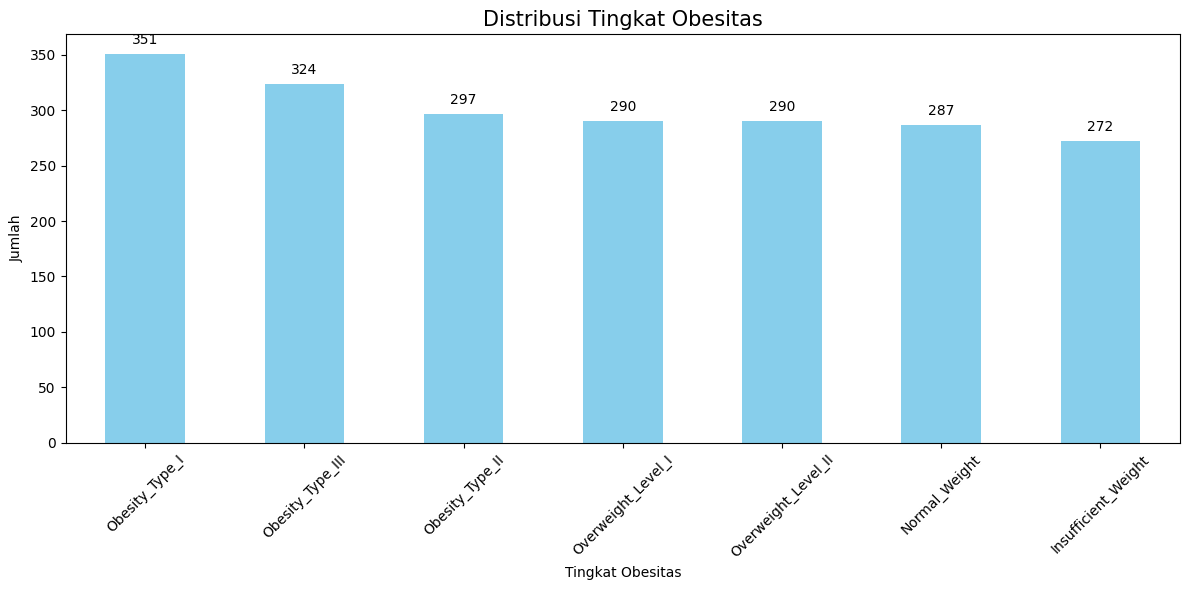

In [6]:
# Visualisasi distribusi kelas target
try:
    plt.figure(figsize=(12, 6))
    ax = df['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribusi Tingkat Obesitas', fontsize=15)
    plt.xlabel('Tingkat Obesitas')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    # Menambahkan label jumlah di atas bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error saat visualisasi distribusi kelas target: {e}")

## cek kategorikal unik

In [7]:
# cek variabel kategorikal
df.describe(include=['object'])

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [8]:
# Cek nilai unik di setiap kolom
print("\nNilai unik untuk setiap kolom:")
for column in df.columns:
    try:
        # Count unique values including NaN values
        unique_count = df[column].nunique(dropna=False)
        print(f"{column}: {unique_count} nilai unik")
        
        # Tampilkan nilai unik jika jumlahnya kurang dari 10
        if unique_count < 10:
            try:
                # Get unique values and handle NaN values for sorting
                unique_list = [x for x in df[column].unique() if pd.notna(x)]
                sorted_values = sorted(unique_list)
                
                # Check if NaN values exist and add them to display
                if df[column].isna().any():
                    print(f"  {sorted_values} + NaN values")
                else:
                    print(f"  {sorted_values}")
            except TypeError:
                # If sorting fails, display unsorted list
                print(f"  {list(df[column].unique())}")
    except Exception as e:
        print(f"Error saat cek nilai unik untuk kolom {column}: {e}")


Nilai unik untuk setiap kolom:
Age: 1395 nilai unik
Gender: 4 nilai unik
  ['?', 'Female', 'Male'] + NaN values
Height: 1563 nilai unik
Weight: 1519 nilai unik
CALC: 6 nilai unik
  ['?', 'Always', 'Frequently', 'Sometimes', 'no'] + NaN values
FAVC: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
FCVC: 809 nilai unik
NCP: 638 nilai unik
SCC: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
SMOKE: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
CH2O: 1264 nilai unik
family_history_with_overweight: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
FAF: 1187 nilai unik
TUE: 1131 nilai unik
CAEC: 6 nilai unik
  ['?', 'Always', 'Frequently', 'Sometimes', 'no'] + NaN values
MTRANS: 7 nilai unik
  ['?', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'] + NaN values
NObeyesdad: 7 nilai unik
  ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


## cek data dublikat

In [9]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 18


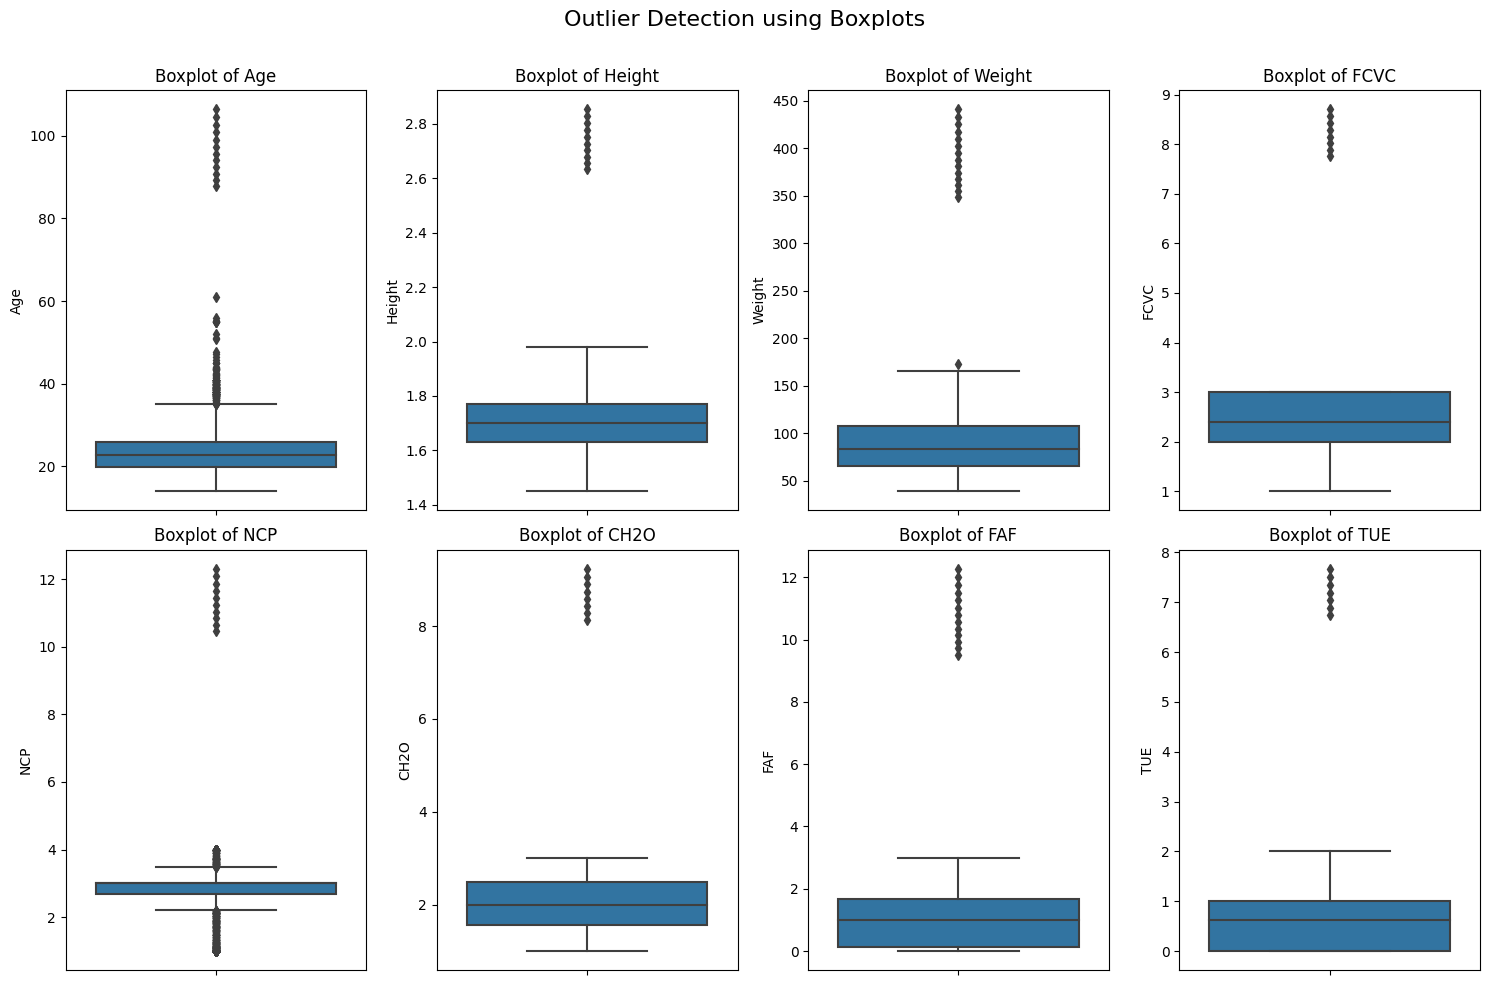

In [10]:
# Convert potential numeric columns to numeric type
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure for boxplots
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Outlier Detection using Boxplots', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# Preprocessing Data 

In [11]:
# Menangani nilai tidak konsisten pada kolom kategorikal
print("Mendeteksi dan menangani nilai tidak konsisten pada kolom kategorikal:")

# Definisikan nilai yang valid untuk setiap kolom kategorikal
valid_values = {
    'Gender': ['Male', 'Female'],
    'CALC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'FAVC': ['yes', 'no'],
    'SCC': ['yes', 'no'],
    'SMOKE': ['yes', 'no'],
    'family_history_with_overweight': ['yes', 'no'],
    'CAEC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'MTRANS': ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']
}

# Definisi categorical_cols (tambahan baris ini)
categorical_cols = list(valid_values.keys())

# Periksa dan ganti nilai tidak konsisten dengan NaN
total_replaced = 0

for col in categorical_cols:
    # Dapatkan nilai unik sebelum penggantian
    unique_vals = df[col].unique()
    
    # Identifikasi nilai yang tidak konsisten
    mask = ~df[col].isin(valid_values.get(col, []))
    
    # Hitung berapa nilai yang akan diganti
    count_replaced = mask.sum()
    
    # Ganti nilai tidak konsisten dengan NaN
    if count_replaced > 0:
        inconsistent_vals = [val for val in unique_vals if val not in valid_values.get(col, []) and pd.notna(val)]
        df.loc[mask, col] = np.nan
        print(f"  {col}: {count_replaced} nilai tidak konsisten diganti dengan NaN")
        print(f"    Nilai yang diganti: {inconsistent_vals}")
        total_replaced += count_replaced

print(f"\nTotal {total_replaced} nilai tidak konsisten telah diganti dengan NaN")

Mendeteksi dan menangani nilai tidak konsisten pada kolom kategorikal:
  Gender: 22 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  CALC: 20 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  FAVC: 22 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  SCC: 18 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  SMOKE: 13 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  family_history_with_overweight: 23 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  CAEC: 18 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']
  MTRANS: 12 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: ['?']

Total 148 nilai tidak konsisten telah diganti dengan NaN


In [12]:
# Tampilkan missing values setelah penggantian
print("\nMissing values setelah penggantian nilai tidak konsisten:")
print(df.isnull().sum())


Missing values setelah penggantian nilai tidak konsisten:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [13]:
# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [14]:
# Hapus duplikat
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris setelah menghapus duplikat: 2091
Jumlah baris duplikat: 0


## menangani outlier

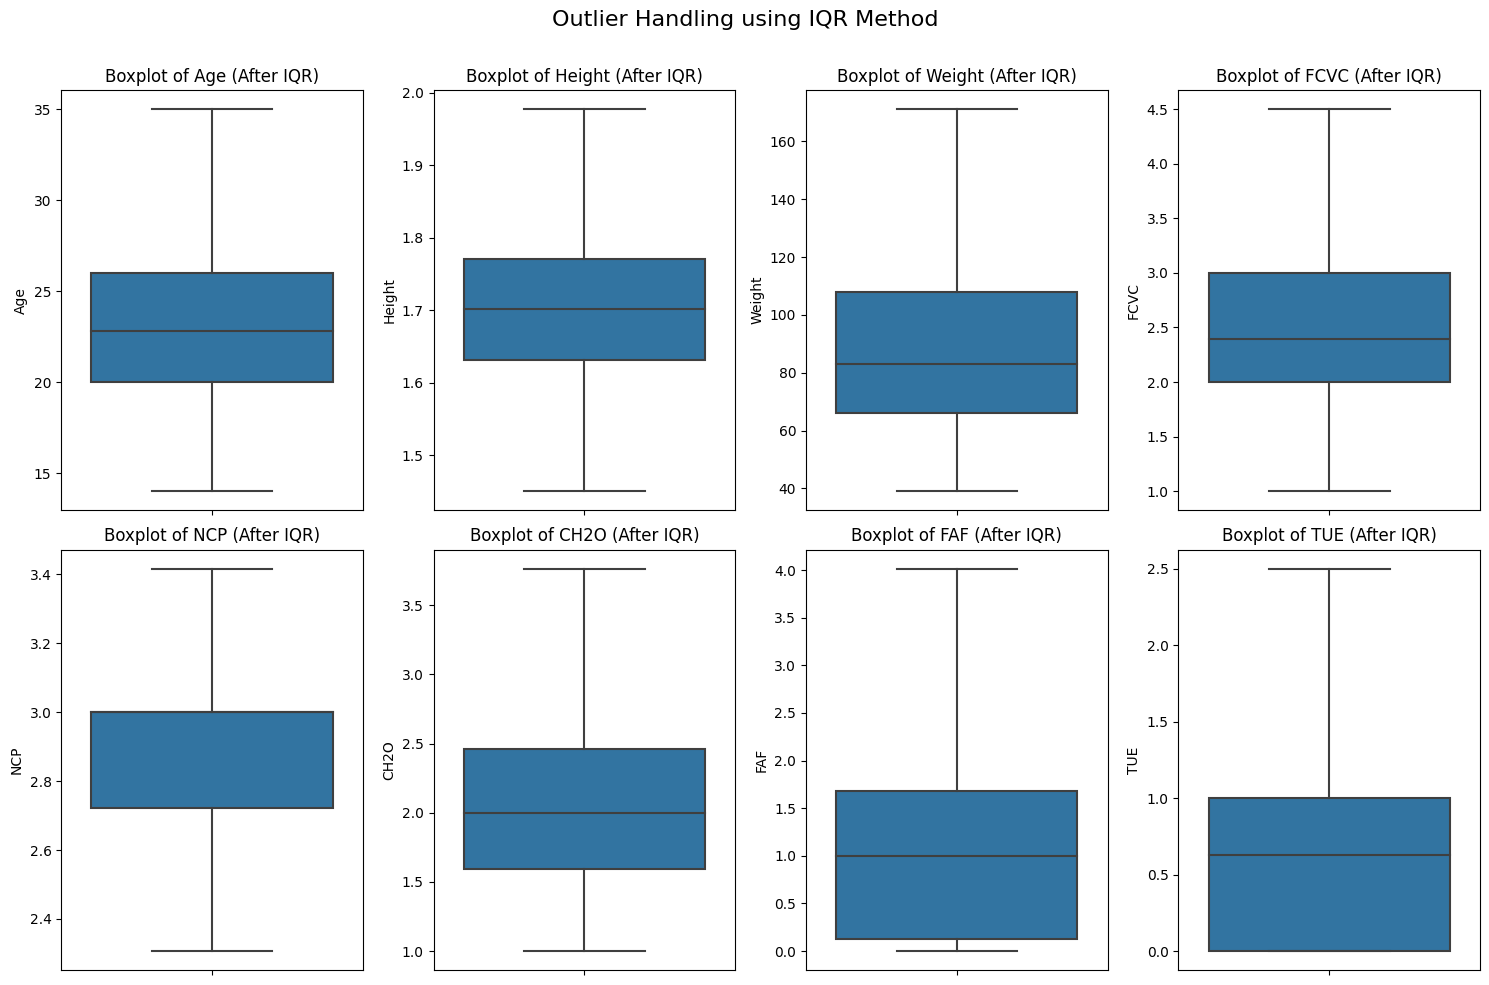

In [15]:
# Salin dataframe untuk menghindari SettingWithCopyWarning
df_cleaned = df.copy()

# Loop melalui setiap kolom numerik untuk menangani outlier
for col in numeric_columns:
    # Hitung Q1, Q3, dan IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ganti outlier dengan batas bawah dan atas
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

# Tampilkan boxplot setelah penanganan outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After IQR)')
    plt.tight_layout()

plt.suptitle('Outlier Handling using IQR Method', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# Ganti df dengan df_cleaned agar perubahan tersimpan
df = df_cleaned

In [16]:
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe untuk menghindari modifikasi pada data asli
df_encoded = df.copy()  # Changed from df_capped to df

# Pertama untuk semua kolom kategorikal kecuali target
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Untuk variabel target, gunakan label encoding
le = LabelEncoder()
df_encoded['NObeyesdad'] = le.fit_transform(df_encoded['NObeyesdad'])

# Tampilkan beberapa baris pertama dari dataframe yang telah di-encode
df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.000000,2.0,0.0,1.0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.000000,3.0,3.0,0.0,1,0,...,1,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.000000,2.0,2.0,1.0,1,1,...,0,0,1,0,1,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.000000,2.0,2.0,0.0,5,1,...,0,0,0,0,1,0,0,0,0,1
4,22.0,1.78,89.8,2.0,2.307067,2.0,0.0,0.0,6,1,...,0,0,0,0,1,0,0,0,1,0


## melakukan penyeimbangan class

Menerapkan RandomUnderSampler untuk menyeimbangkan data...


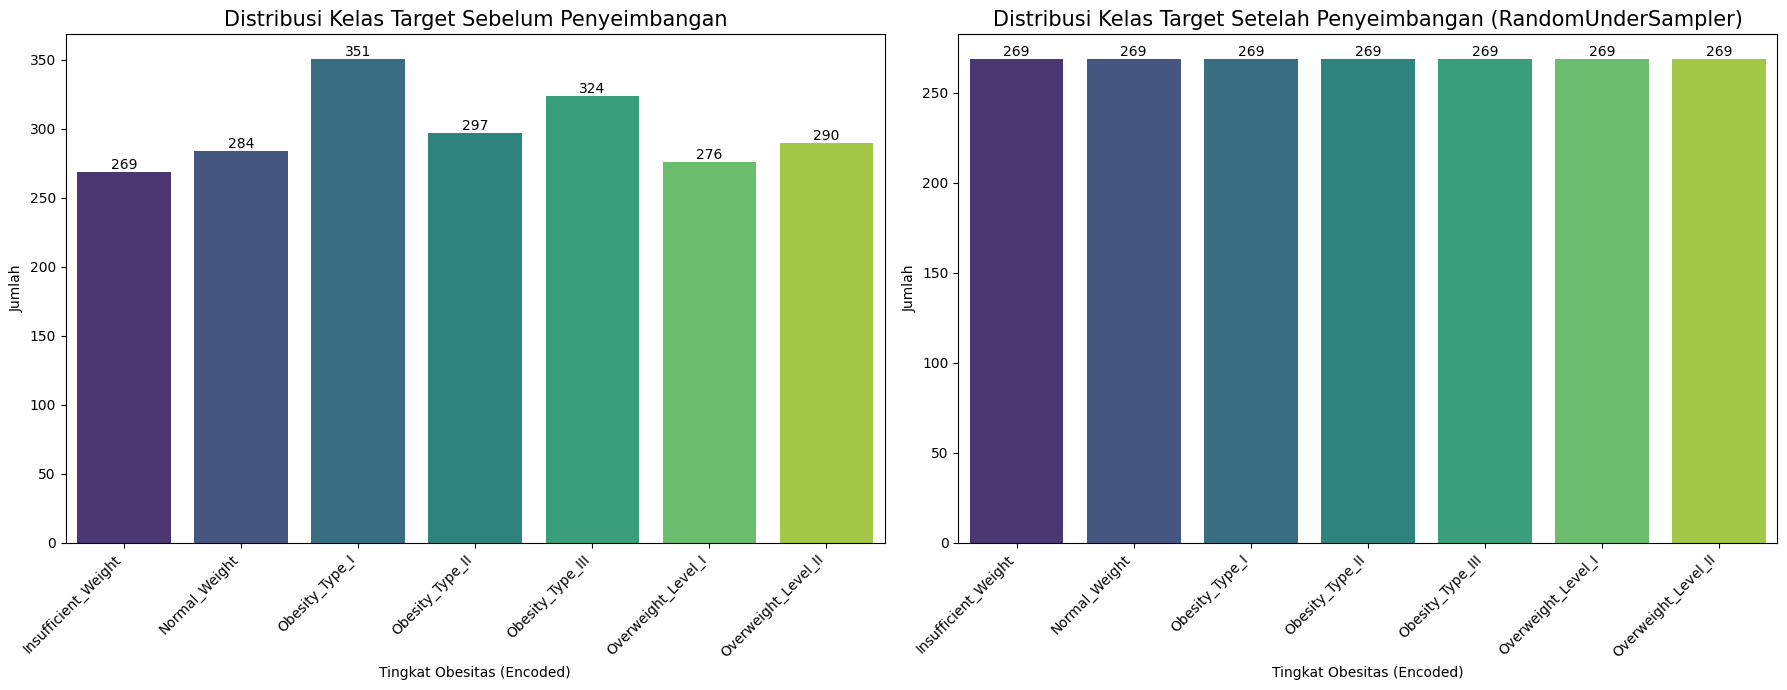

In [17]:
# Mengimpor library yang diperlukan 
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Memisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Menerapkan RandomUnderSampler
print("Menerapkan RandomUnderSampler untuk menyeimbangkan data...")
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


# Visualisasi distribusi kelas target sebelum dan sesudah penyeimbangan
original_counts = df_encoded['NObeyesdad'].value_counts().sort_index()
resampled_counts = y_resampled.value_counts().sort_index()

# Mendapatkan nama kelas dari LabelEncoder
class_names = le.classes_

plt.figure(figsize=(18, 7))

# Plot sebelum penyeimbangan
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=original_counts.index, y=original_counts.values, palette='viridis')
plt.title('Distribusi Kelas Target Sebelum Penyeimbangan', fontsize=15)
plt.xlabel('Tingkat Obesitas (Encoded)')
plt.ylabel('Jumlah')
plt.xticks(ticks=original_counts.index, labels=[class_names[i] for i in original_counts.index], rotation=45, ha="right")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot setelah penyeimbangan
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=resampled_counts.index, y=resampled_counts.values, palette='viridis')
plt.title('Distribusi Kelas Target Setelah Penyeimbangan (RandomUnderSampler)', fontsize=15)
plt.xlabel('Tingkat Obesitas (Encoded)')
plt.ylabel('Jumlah')
plt.xticks(ticks=resampled_counts.index, labels=[class_names[i] for i in resampled_counts.index], rotation=45, ha="right")
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

# Membuat salinan data yang sudah diseimbangkan untuk menghindari modifikasi pada data asli
X_normalized = X_resampled.copy()

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan fitting dan transformasi data
X_normalized = pd.DataFrame(
    scaler.fit_transform(X_normalized),
    columns=X_normalized.columns,
    index=X_normalized.index
)

# Menampilkan informasi tentang data yang telah dinormalisasi
print("Normalisasi data selesai menggunakan StandardScaler")
print("\nStatistik fitur yang telah dinormalisasi:")
print(X_normalized.describe().T[['mean', 'std', 'min', 'max']])



Normalisasi data selesai menggunakan StandardScaler

Statistik fitur yang telah dinormalisasi:
                                            mean       std       min  \
Age                                 1.207508e-16  1.000266 -1.868619   
Height                             -9.471388e-16  1.000266 -2.676085   
Weight                             -1.509384e-16  1.000266 -1.741933   
FCVC                               -5.282846e-16  1.000266 -2.596803   
NCP                                 5.056438e-16  1.000266 -1.723773   
CH2O                                3.396115e-16  1.000266 -1.634892   
FAF                                 7.546922e-17  1.000266 -1.184277   
TUE                                 4.528153e-17  1.000266 -1.084265   
Gender_Male                         7.546922e-17  1.000266 -1.026370   
CALC_Frequently                    -1.698058e-17  1.000266 -0.189086   
CALC_Sometimes                     -6.037538e-17  1.000266 -1.417035   
CALC_no                            -1.207

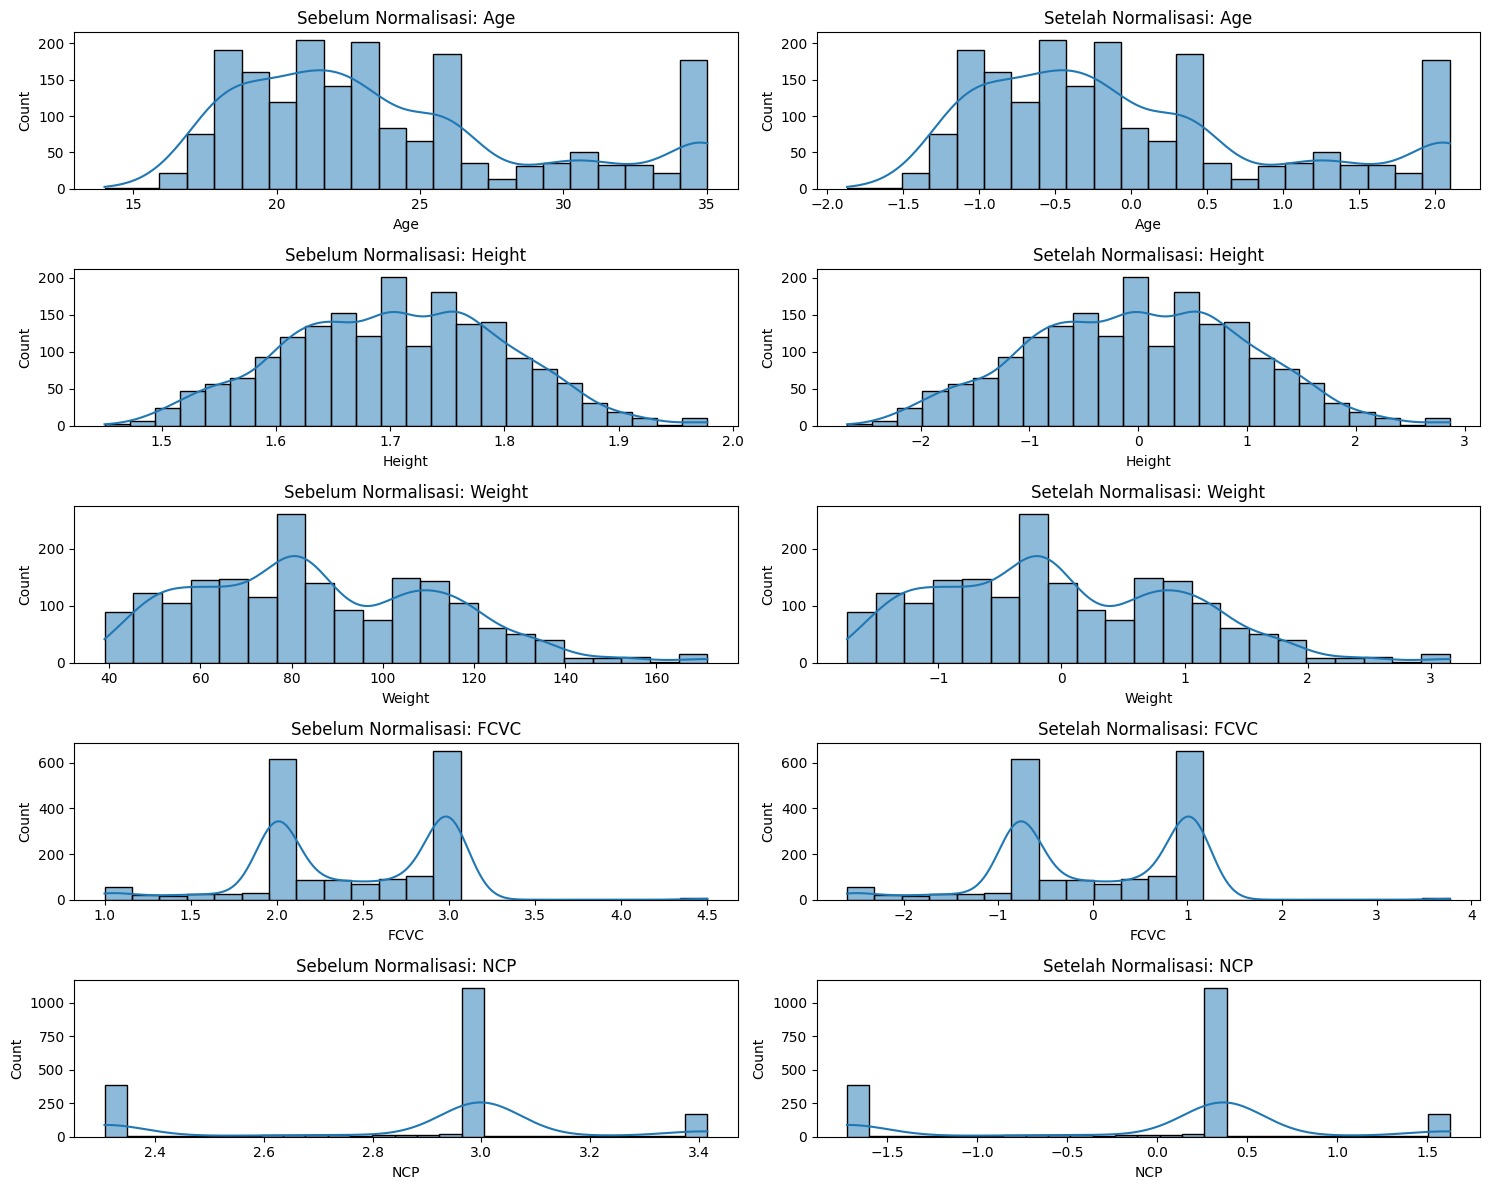

In [19]:
# Visualisasi distribusi fitur sebelum dan sesudah normalisasi
features_to_plot = X_normalized.columns[:5]  # Menampilkan 5 fitur pertama
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features_to_plot):
    # Sebelum normalisasi
    plt.subplot(5, 2, 2*i+1)
    sns.histplot(X_resampled[feature], kde=True)
    plt.title(f'Sebelum Normalisasi: {feature}')
    
    # Setelah normalisasi
    plt.subplot(5, 2, 2*i+2)
    sns.histplot(X_normalized[feature], kde=True)
    plt.title(f'Setelah Normalisasi: {feature}')

plt.tight_layout()
plt.show()

#  Pemodelan

In [20]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
# X_normalized adalah fitur yang sudah dinormalisasi dan diseimbangkan
# y_resampled adalah target yang sudah diseimbangkan
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Menampilkan ukuran dari setiap set data
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target uji (y_test):", y_test.shape)

Ukuran data latih (X_train): (1506, 23)
Ukuran data uji (X_test): (377, 23)
Ukuran target latih (y_train): (1506,)
Ukuran target uji (y_test): (377,)


- Membagi data menjadi data latih dan data uji
- X_normalized adalah fitur yang sudah dinormalisasi dan diseimbangkan
- y_resampled adalah target yang sudah diseimbangkan

## 1. Logistic Regression

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Latih model dan ukur waktu pelatihan
start_time_train_lr = time.time()
lr_model.fit(X_train, y_train)
end_time_train_lr = time.time()
training_time_lr = end_time_train_lr - start_time_train_lr
print(f"Waktu pelatihan: {training_time_lr:.4f} detik")

# Buat prediksi dan ukur waktu prediksi
start_time_pred_lr = time.time()
y_pred_lr = lr_model.predict(X_test)
end_time_pred_lr = time.time()
prediction_time_lr = end_time_pred_lr - start_time_pred_lr
print(f"Waktu prediksi: {prediction_time_lr:.4f} detik")

# Evaluasi model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi: {accuracy_lr:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

Waktu pelatihan: 0.0511 detik
Waktu prediksi: 0.0020 detik
Akurasi: 0.8302

Laporan Klasifikasi:
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.98      0.88        53
      Normal_Weight       0.77      0.61      0.68        54
     Obesity_Type_I       0.88      0.78      0.82        54
    Obesity_Type_II       0.93      1.00      0.96        54
   Obesity_Type_III       0.96      0.98      0.97        54
 Overweight_Level_I       0.73      0.69      0.70        54
Overweight_Level_II       0.74      0.78      0.76        54

           accuracy                           0.83       377
          macro avg       0.83      0.83      0.83       377
       weighted avg       0.83      0.83      0.83       377



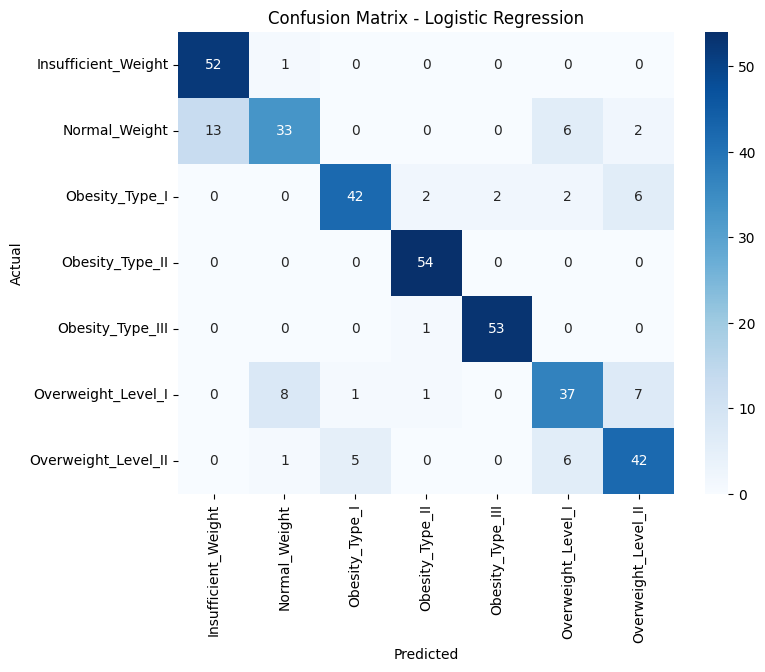

In [22]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store results for later comparison if needed
model_performance = {}
model_performance['Logistic Regression'] = {'accuracy': accuracy_lr, 'train_time': training_time_lr, 'pred_time': prediction_time_lr}

## 2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model_rf = RandomForestClassifier(random_state=42) 

# Latih model dan ukur waktu pelatihan
start_time_train_rf = time.time()
model_rf.fit(X_train, y_train)
end_time_train_rf = time.time()
training_time_rf = end_time_train_rf - start_time_train_rf
print(f"Training time: {training_time_rf:.4f} seconds")

# Buat prediksi dan ukur waktu prediksi
start_time_pred_rf = time.time()
y_pred_rf = model_rf.predict(X_test)
end_time_pred_rf = time.time()
prediction_time_rf = end_time_pred_rf - start_time_pred_rf
print(f"Prediction time: {prediction_time_rf:.4f} seconds")

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))


Training time: 0.1848 seconds
Prediction time: 0.0080 seconds
Accuracy: 0.9576

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        53
      Normal_Weight       0.84      0.94      0.89        54
     Obesity_Type_I       1.00      0.96      0.98        54
    Obesity_Type_II       1.00      1.00      1.00        54
   Obesity_Type_III       1.00      1.00      1.00        54
 Overweight_Level_I       0.94      0.89      0.91        54
Overweight_Level_II       0.96      0.94      0.95        54

           accuracy                           0.96       377
          macro avg       0.96      0.96      0.96       377
       weighted avg       0.96      0.96      0.96       377



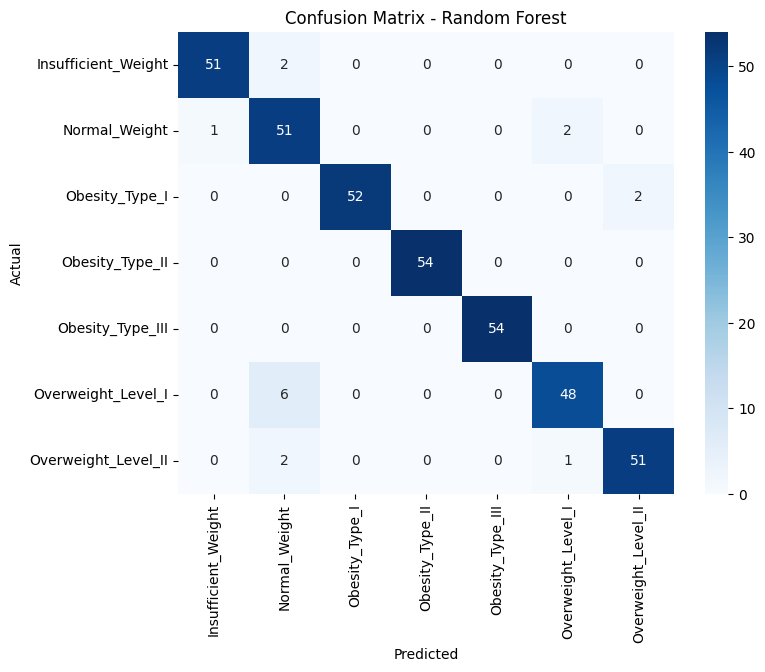

In [24]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store results
model_performance['Random Forest'] = {'accuracy': accuracy_rf, 'train_time': training_time_rf, 'pred_time': prediction_time_rf}

## 3. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model
svm_model = SVC(random_state=42)

# Latih model dan ukur waktu pelatihan
start_time_train_svm = time.time()
svm_model.fit(X_train, y_train)
end_time_train_svm = time.time()
training_time_svm = end_time_train_svm - start_time_train_svm
print(f"Training time: {training_time_svm:.4f} seconds")

# Buat prediksi dan ukur waktu prediksi
start_time_pred_svm = time.time()
y_pred_svm = svm_model.predict(X_test)
end_time_pred_svm = time.time()
prediction_time_svm = end_time_pred_svm - start_time_pred_svm
print(f"Prediction time: {prediction_time_svm:.4f} seconds")

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

--- Support Vector Machine (SVM) ---
Training time: 0.0282 seconds
Prediction time: 0.0162 seconds
Accuracy: 0.8515

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92        53
      Normal_Weight       0.62      0.76      0.68        54
     Obesity_Type_I       0.87      0.89      0.88        54
    Obesity_Type_II       0.93      1.00      0.96        54
   Obesity_Type_III       0.98      0.98      0.98        54
 Overweight_Level_I       0.78      0.70      0.74        54
Overweight_Level_II       0.90      0.70      0.79        54

           accuracy                           0.85       377
          macro avg       0.86      0.85      0.85       377
       weighted avg       0.86      0.85      0.85       377



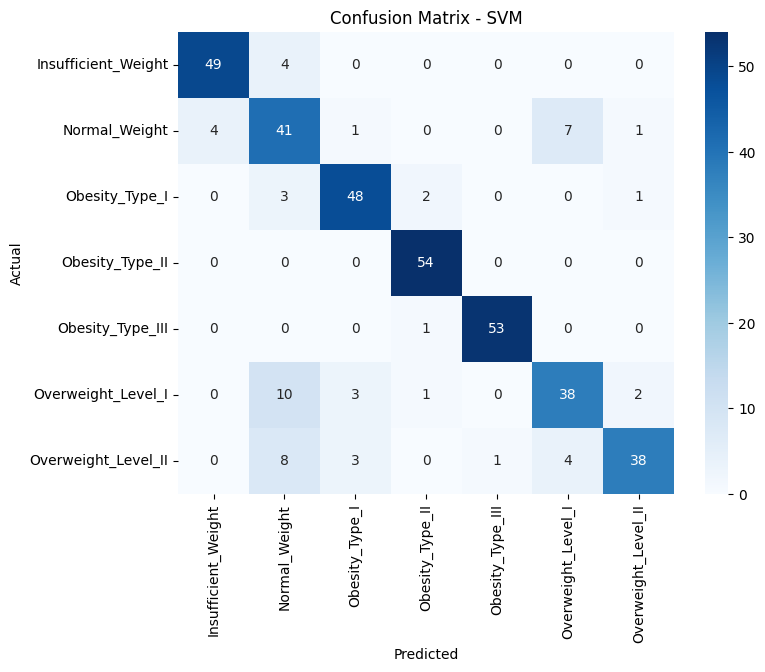

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store results
model_performance['SVM'] = {'accuracy': accuracy_svm, 'train_time': training_time_svm, 'pred_time': prediction_time_svm}

## 4. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model
knn_model = KNeighborsClassifier() # Default n_neighbors=5

# Latih model dan ukur waktu pelatihan
start_time_train_knn = time.time()
knn_model.fit(X_train, y_train)
end_time_train_knn = time.time()
training_time_knn = end_time_train_knn - start_time_train_knn
print(f"Training time: {training_time_knn:.4f} seconds")

# Buat prediksi dan ukur waktu prediksi
start_time_pred_knn = time.time()
y_pred_knn = knn_model.predict(X_test)
end_time_pred_knn = time.time()
prediction_time_knn = end_time_pred_knn - start_time_pred_knn
print(f"Prediction time: {prediction_time_knn:.4f} seconds")

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

Training time: 0.0000 seconds
Prediction time: 0.0876 seconds
Accuracy: 0.8011

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.94      0.84        53
      Normal_Weight       0.60      0.48      0.54        54
     Obesity_Type_I       0.76      0.83      0.80        54
    Obesity_Type_II       0.95      0.98      0.96        54
   Obesity_Type_III       0.91      0.98      0.95        54
 Overweight_Level_I       0.76      0.69      0.72        54
Overweight_Level_II       0.83      0.70      0.76        54

           accuracy                           0.80       377
          macro avg       0.80      0.80      0.79       377
       weighted avg       0.80      0.80      0.79       377




Confusion Matrix:


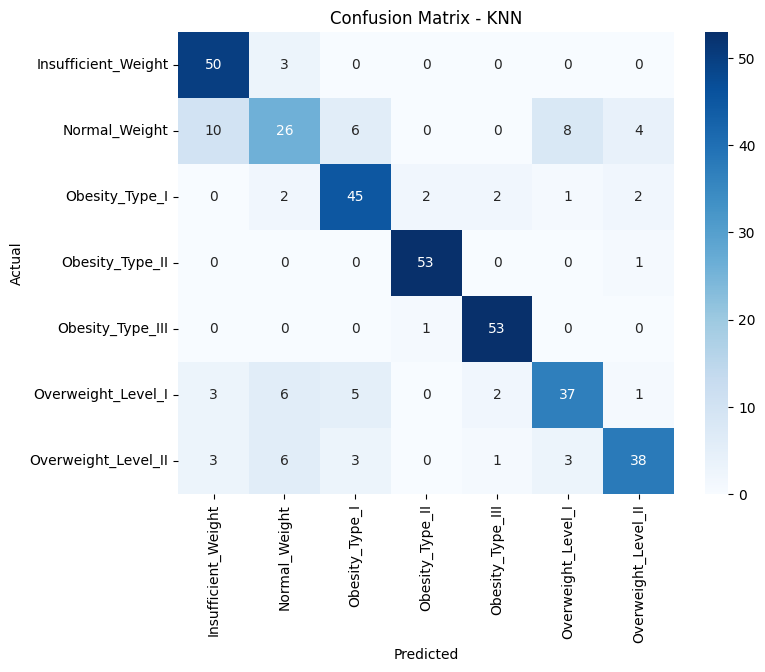

In [28]:
print("\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store results
model_performance['KNN'] = {'accuracy': accuracy_knn, 'train_time': training_time_knn, 'pred_time': prediction_time_knn}

## 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model dan ukur waktu pelatihan
start_time_train_dt = time.time()
dt_model.fit(X_train, y_train)
end_time_train_dt = time.time()
training_time_dt = end_time_train_dt - start_time_train_dt
print(f"Training time: {training_time_dt:.4f} seconds")

# Buat prediksi dan ukur waktu prediksi
start_time_pred_dt = time.time()
y_pred_dt = dt_model.predict(X_test)
end_time_pred_dt = time.time()
prediction_time_dt = end_time_pred_dt - start_time_pred_dt
print(f"Prediction time: {prediction_time_dt:.4f} seconds")

# Evaluasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=class_names))

Training time: 0.0000 seconds
Prediction time: 0.0000 seconds
Accuracy: 0.9019

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.91      0.91        53
      Normal_Weight       0.83      0.89      0.86        54
     Obesity_Type_I       0.88      0.91      0.89        54
    Obesity_Type_II       1.00      0.94      0.97        54
   Obesity_Type_III       0.93      0.94      0.94        54
 Overweight_Level_I       0.89      0.91      0.90        54
Overweight_Level_II       0.90      0.81      0.85        54

           accuracy                           0.90       377
          macro avg       0.90      0.90      0.90       377
       weighted avg       0.90      0.90      0.90       377



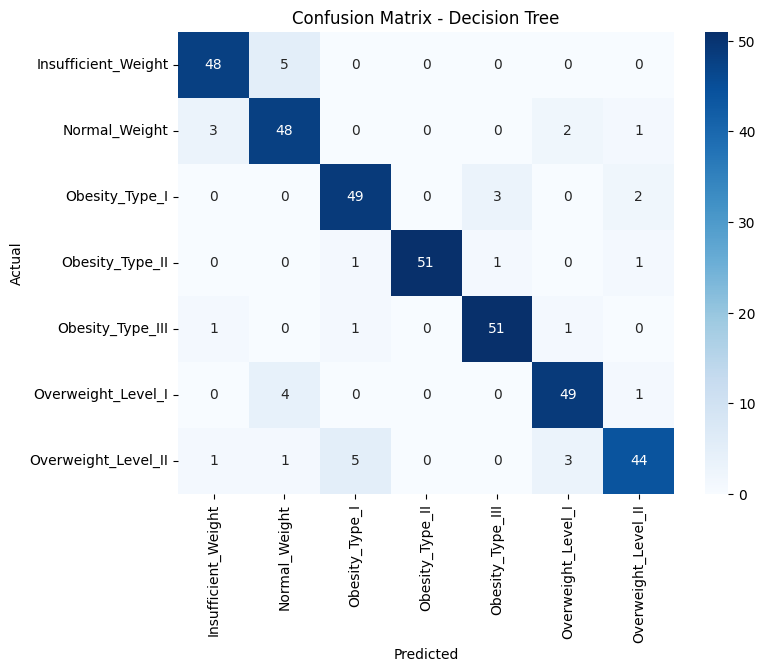

In [30]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store results
model_performance['Decision Tree'] = {'accuracy': accuracy_dt, 'train_time': training_time_dt, 'pred_time': prediction_time_dt}